**This code is part of Hands-on session Day-1 of Tropical Dynamics and Global Monsoons workshop (17-21/06/2024) at IIT Bombay,India**

# Installation of libraries


In [10]:
!pip install xarray numpy pandas geopandas cartopy matplotlib 

# Step :1 Import the libraries

In [11]:
import xarray as xr # reads and handles netcdf files with metadata
import numpy as np   # module for numerical computing
import pandas as pd # module for data manipulation and analysis
import geopandas as gpd
import matplotlib.pyplot as plt  #essential for plotting
import cartopy.crs as ccrs  #important for  map projections

# Step:2  Load the data

In [12]:
country = "South_Korea"  # Put your country name
path = "C:/Users/user/Downloads/Met_data/Excel format/pcp_S_Korea_1970-2020_Monthly.csv"  #location of file in your folder
data = xr.open_dataset(path) # 'data' named variable contains the dataset
#data #what all is there in the dataset

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'scipy']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

In [4]:
#get the variable of interest from the main dataset
Pr = data['tp']
Pr= Pr*32.8767  #convert m/month to mm/day
print(Pr.shape) #to check dimension of the variable


(612, 111, 117)


# Step:3 To calc. Annual Climatological mean

In [11]:
spatial_mean_pr = Pr.mean(dim=['latitude','longitude']) #spatial mean
print(spatial_mean_pr.shape)
yearmean_pr = spatial_mean_pr.resample(time='1Y').mean()  #getting yearly mean values
print(yearmean_pr.shape) # 612/12 = 51 years from 1970-2022

pr_clim = yearmean_pr.mean(skipna=True)  #pr_clim will give the annual climatological mean which is required
print(f"The  annual climatological mean of the precipitation over {country} is: {pr_clim:.4f} mm/day") 

(612,)
(51,)
The  annual climatological mean of the precipitation over India is: 0.1216 mm/day


# Step:4 Prepare data for the Spatial distribution of annual rainfall climatology

In [12]:
pr_mean = Pr.mean(skipna=True,dim="time") #use pr_mean for spatial plot
print(pr_mean.shape)

(111, 117)


# Step:5 Plot the data

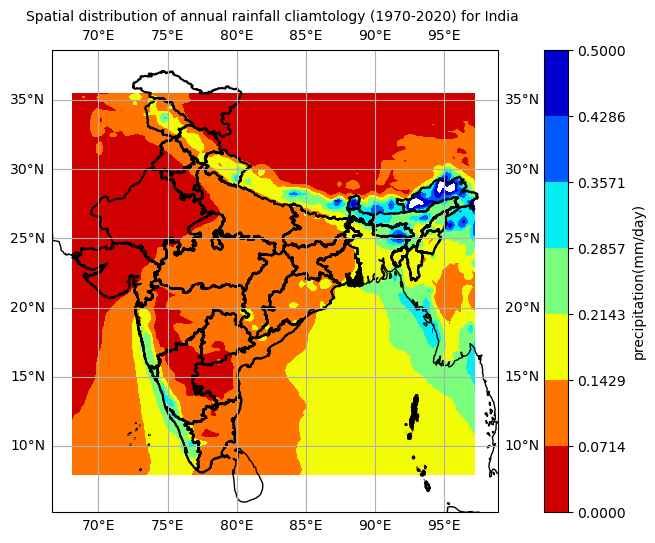

In [18]:
shapefile = gpd.read_file('/Users/sakshi/Documents/workshop/OneDrive_1_17-06-2024/India_State_Boundary.shp') #set location of the shapefile from your laptop

# Choose this file from all the avialable shape files from the folder:
# Japan       -  jp.shp 
# Malaysia    -  MYS.adm0.shp
# Indonesia   -  IDN.adm0.shp
# South Korea -  kr.shp
# UAE         -  ae.shp
# Sri Lanka   -  lk.shp
# Thailand    -  thailand-provinces.shp 

#plotting the figure now
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
lon,lat = np.meshgrid(pr_mean["longitude"],pr_mean["latitude"])
plt.contourf(lon,lat,pr_mean,transform=ccrs.PlateCarree(), cmap='jet_r')
shapefile.boundary.plot(ax=ax, edgecolor='black', linewidth=1.5)
plt.title(f'Spatial distribution of annual rainfall climatology (1970-2020) for {country} ',fontsize=10)
plt.colorbar(label='precipitation(mm/day)')
ax.gridlines(draw_labels=True)
plt.savefig(f'Spatial_plot .jpg'),dpi=300) #save the figure